In [2]:
import numpy as np
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from PIL import Image
import cv2


2023-10-23 16:40:21.956737: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 16:40:22.001434: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 16:40:22.002220: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 16:40:22.748673: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


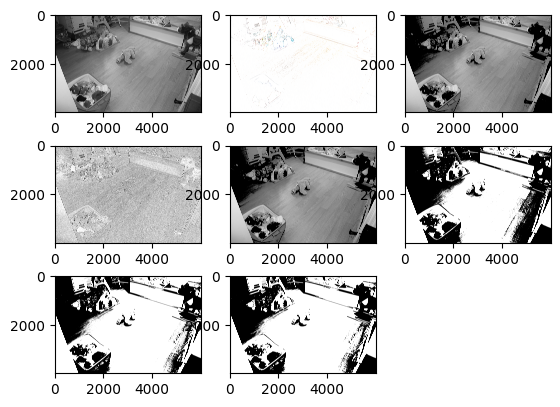

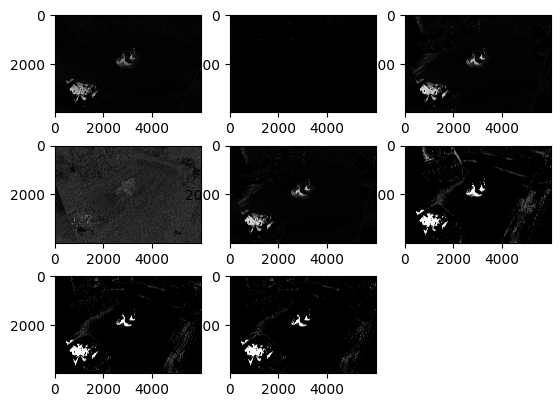

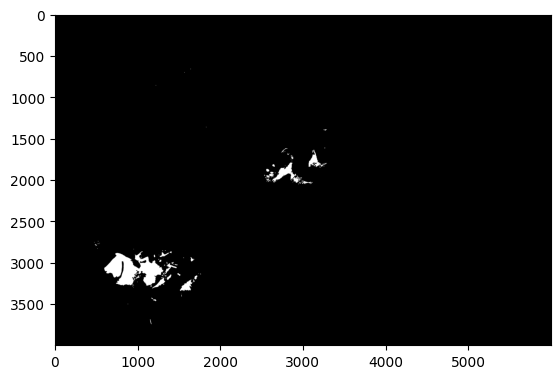

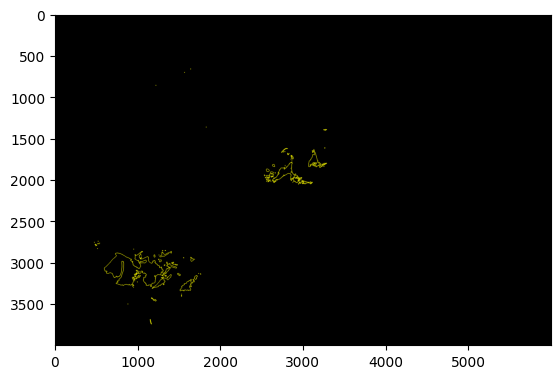

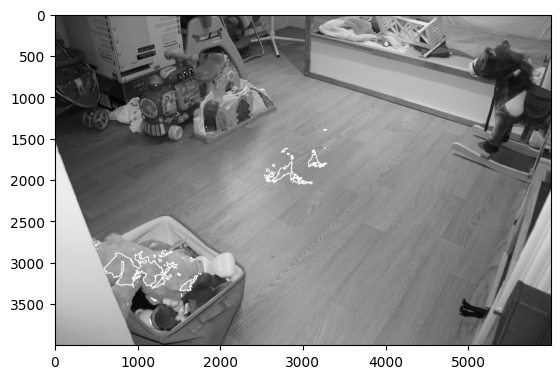

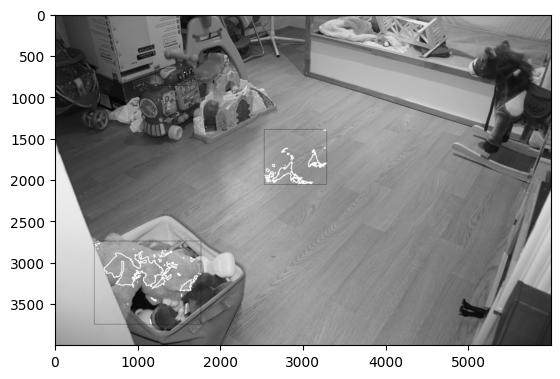

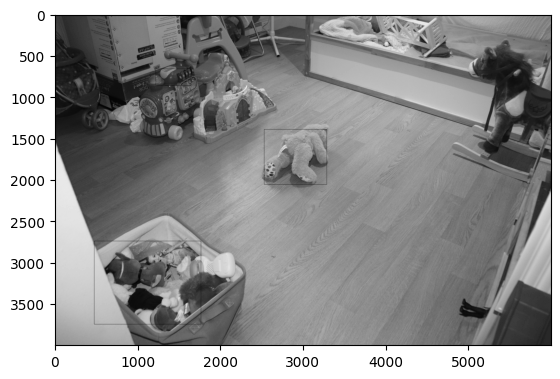

In [52]:
## Détetection de changements

# Load the original image (250x250):
image = cv2.imread('Images/Chambre/Reference.JPG')
image = image[:,:,::-1]
imagebisgris = cv2.imread('Images/Chambre/IMG_6567.JPG',cv2.IMREAD_GRAYSCALE)

#plt.imshow(image)

# Conversion de l'image en noir et blanc
image_gris = cv2.imread('Images/Chambre/Reference.JPG', cv2.IMREAD_GRAYSCALE)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
(thresh, blackAndWhiteImage) = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
#plt.imshow(gray_img,cmap='gray')

# Traitement de l'image
#Processus de bas niveau : suppression de bruit;✓ augmenter le contraste de l’image;✓ normaliser l’éclairage;✓ correction de la perspective
kernel_averaging_5_5 = np.ones((5, 5), np.float32) / 25
smooth_image_f2D = cv2.filter2D(gray_img, -1, kernel_averaging_5_5)
sketch_gray, sketch_color = cv2.pencilSketch(image, sigma_s=30, sigma_r=0.1, shade_factor=0.1)
#plt.imshow(sketch_color,cmap='gray')

imagethreshor = cv2.threshold(image_gris,80,255,cv2.THRESH_TOZERO)[1]
imagethresh = cv2.threshold(imagebisgris,80,255,cv2.THRESH_TOZERO)[1]

th3or = cv2.adaptiveThreshold(image_gris,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(imagebisgris,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
#plt.imshow(th3,cmap='gray')

thresh1or = cv2.threshold(image_gris,80,255,cv2.THRESH_TOZERO)[1]
thresh1 = cv2.threshold(imagebisgris,80,255,cv2.THRESH_TOZERO)[1]
#plt.imshow(thresh1,cmap='gray')

#erosion1 = cv2.erode(thresh1,kernel,iterations = 1)
#dilation1 = cv2.dilate(erosion1,kernel,iterations = 1)

thresh2or = cv2.threshold(image_gris,120,255,cv2.THRESH_BINARY)[1]
thresh2 = cv2.threshold(imagebisgris,120,255,cv2.THRESH_BINARY)[1]
#erosion2 = cv2.erode(thresh2,kernel,iterations = 1)
#dilation2 = cv2.dilate(erosion2,kernel,iterations = 1)

# Otsu's thresholding
ret2or,th2or = cv2.threshold(image_gris,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret2,th2 = cv2.threshold(imagebisgris,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering

bluror = cv2.GaussianBlur(image_gris,(5,5),0)
ret3or,th33or = cv2.threshold(bluror,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
blur = cv2.GaussianBlur(imagebisgris,(5,5),0)
ret3,th33 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images = [imagebisgris, sketch_color,
 imagethresh, th3, thresh1,
 thresh2, th2, th33]

#Processus de niveau intermédiaire: extraction 
imdiff = cv2.subtract(imagethresh, thresh1)
#plt.imshow(imdiff,cmap='gray')
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i],'gray')
plt.show()


# Soustraction de deux images
end1 = cv2.subtract(image_gris, imagebisgris)
end2 = cv2.subtract(image_gris, sketch_gray)
end3 = cv2.subtract(imagethreshor, imagethresh)
end4 = cv2.subtract(th3or, th3)
end5 = cv2.subtract(thresh1or, thresh1)
end6 = cv2.subtract(thresh2or, thresh2)
end7 = cv2.subtract(th2or, th2)
end8 = cv2.subtract(th33or, th33)
imagesous = [end1, end2,
 end3, end4, end5,
 end6, end7, end8]
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.imshow(imagesous[i],'gray')
plt.show()



# Appliquer un filtre de seuillage adaptatif basé sur OTSU
_, end5_thresh = cv2.threshold(end5, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Appliquer un seuillage plus agressif
_, end5_thresh = cv2.threshold(end5, 150, 255, cv2.THRESH_BINARY)

# Appliquer un flou gaussien pour réduire le bruit
blurred = cv2.GaussianBlur(end5_thresh, (5, 5), 0)

# Appliquer une opération de fermeture (dilatation suivie d'une érosion)
kernel = np.ones((5,5),np.uint8)
end5_cleaned = cv2.morphologyEx(blurred, cv2.MORPH_CLOSE, kernel)


# Trouver les contours dans l'image
contours, _ = cv2.findContours(end5_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Créer un masque vide
mask = np.zeros_like(end5)

# Dessiner les contours avec remplissage
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Afficher le résultat
plt.imshow(mask, 'gray')
plt.show()
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


drawing = np.zeros((end6.shape[0], end6.shape[1], 3), dtype=np.uint8)
CountersImg = cv2.drawContours(drawing, contours, -1, (255, 255, 0), 3)
#plt.imshow("Contours", CountersImg)
plt.imshow(CountersImg)
plt.show()
ImgWithCounter = cv2.drawContours(image_gris, contours, -1, (255, 255, 0), 10)
plt.imshow(ImgWithCounter, 'gray')
plt.show()

## Initialiser une liste pour stocker les boîtes englobantes fusionnées
merged_boxes = []

# Seuil de proximité pour fusionner les boîtes (ajustez selon vos besoins)
seuil_proximite = 500  # Ajustez selon vos besoins

# Fusionner les boîtes englobantes proches
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # Vérifier si une boîte englobante est suffisamment proche d'une boîte existante
    merged = False
    for i, box in enumerate(merged_boxes):
        bx, by, bw, bh = box
        if (abs(x - bx) < seuil_proximite and abs(y - by) < seuil_proximite):
            # Fusionner la boîte englobante courante avec la boîte existante
            merged_boxes[i] = (
                min(x, bx), 
                min(y, by), 
                max(x + w, bx + bw) - min(x, bx), 
                max(y + h, by + bh) - min(y, by)
            )
            merged = True
            break
    
    if not merged:
        merged_boxes.append((x, y, w, h))

# Fusionner les boîtes englobantes qui se chevauchent
final_merged_boxes = []

for box in merged_boxes:
    x, y, w, h = box
    box_merged = False
    
    for existing_box in final_merged_boxes:
        ex, ey, ew, eh = existing_box
        
        # Vérifier si la boîte courante se chevauche avec une boîte existante
        if (x < ex + ew and x + w > ex and y < ey + eh and y + h > ey):
            new_x = min(x, ex)
            new_y = min(y, ey)
            new_w = max(x + w, ex + ew) - new_x
            new_h = max(y + h, ey + eh) - new_y
            final_merged_boxes.remove(existing_box)
            final_merged_boxes.append((new_x, new_y, new_w, new_h))
            box_merged = True
            break
    
    if not box_merged:
        final_merged_boxes.append(box)

# Dessiner les boîtes englobantes fusionnées
for box in final_merged_boxes:
    x, y, w, h = box
    cv2.rectangle(ImgWithCounter, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(imagebisgris, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Afficher l'image avec les contours et les boîtes englobantes
plt.imshow(ImgWithCounter,'gray')
plt.show()
plt.imshow(imagebisgris,'gray')
plt.show()




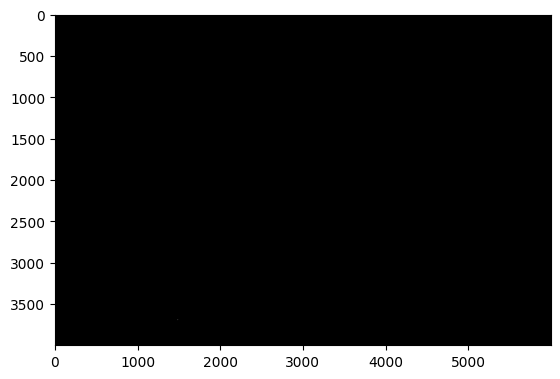

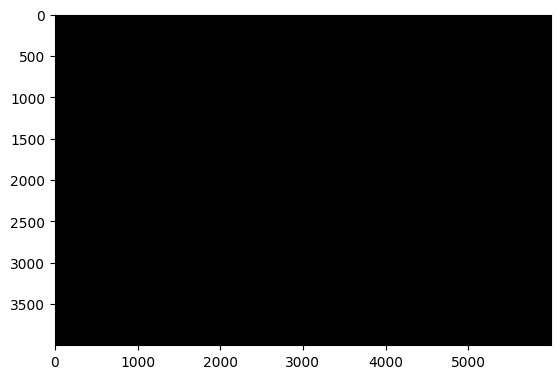

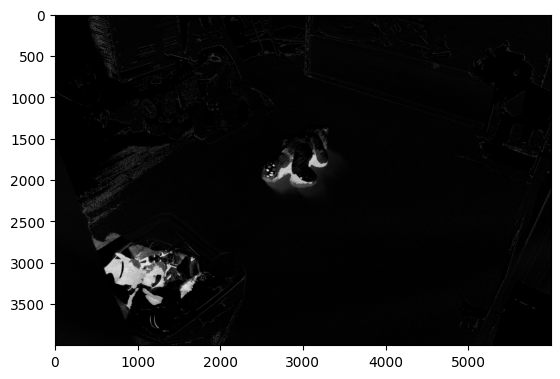

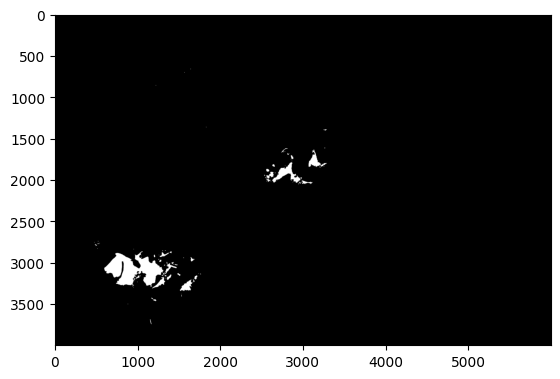

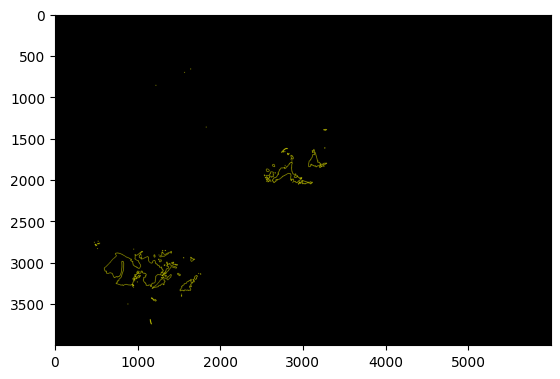

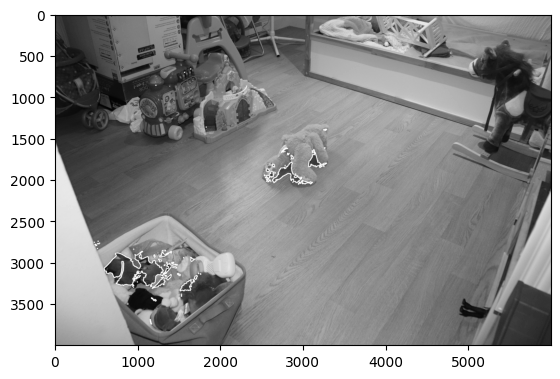

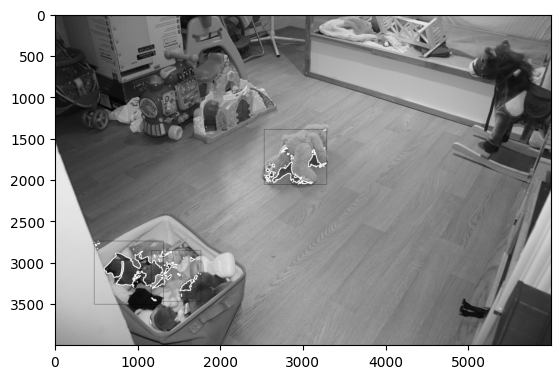

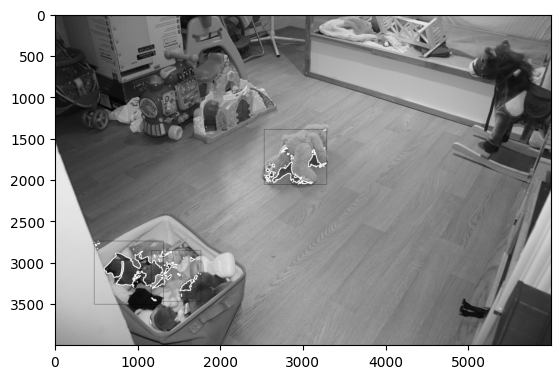

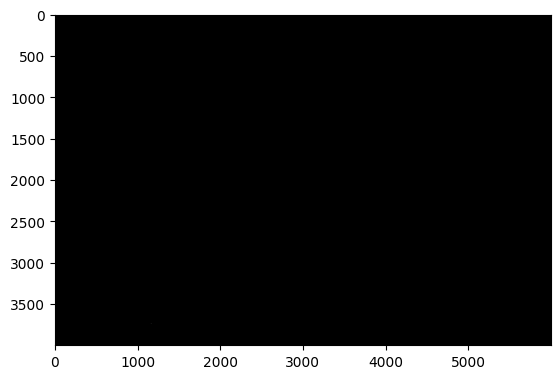

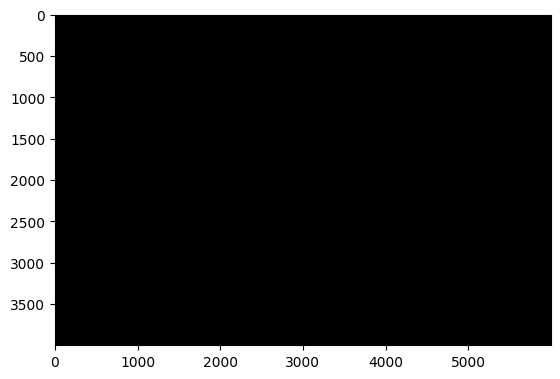

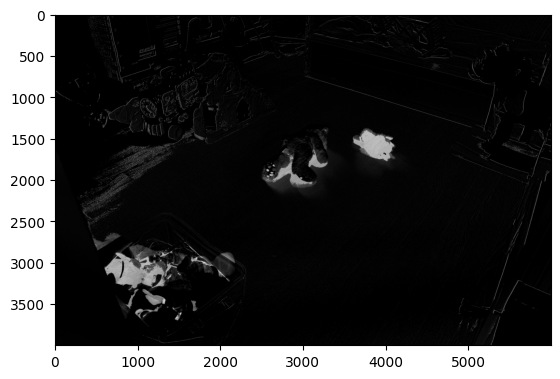

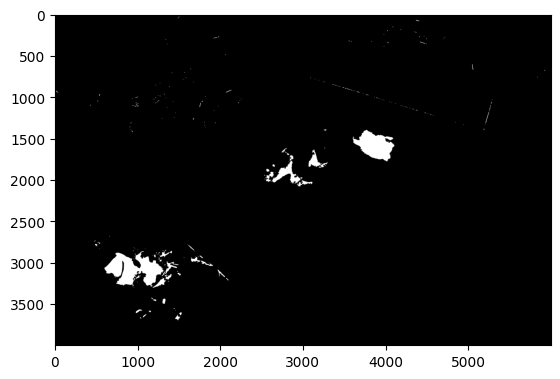

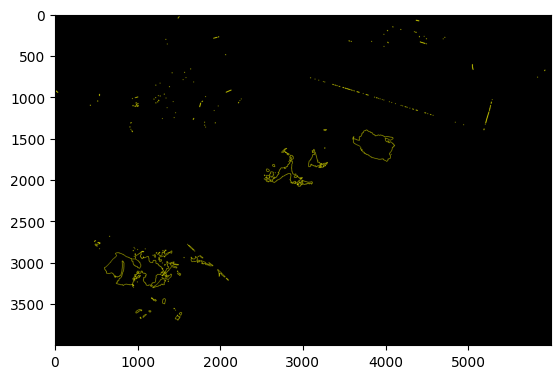

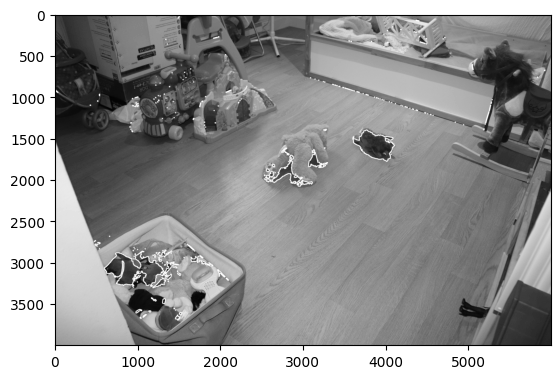

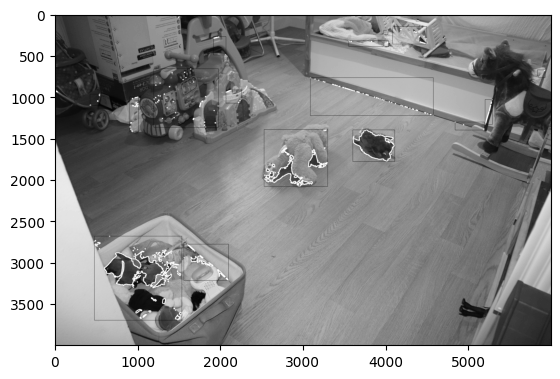

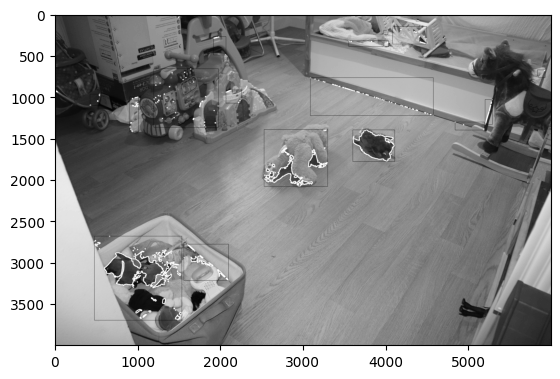

In [75]:
imageref = cv2.imread('Images/Chambre/Reference.JPG',cv2.IMREAD_GRAYSCALE)

images = [cv2.imread('Images/Chambre/IMG_6567.JPG'), cv2.imread('Images/Chambre/IMG_6568.JPG'), cv2.imread('Images/Chambre/IMG_6569.JPG'),cv2.imread('Images/Chambre/IMG_6570.JPG'),cv2.imread('Images/Chambre/IMG_6571.JPG'), cv2.imread('Images/Chambre/IMG_6572.JPG'), cv2.imread('Images/Chambre/IMG_6573.JPG')]
for i in images:
    image_gris = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) 

    edges = cv2.Canny(blurred, 50, 150)  # Appliquer l'algorithme de Canny
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Identifier le contour du sol (en fonction de sa position verticale)
    ground_contour = None
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if h < 10:  # Supposer que le sol a une hauteur minimale
            ground_contour = contour
            break

    # Créer un masque pour isoler la région du sol
    mask_ground = np.zeros_like(image_gris)
    cv2.drawContours(mask_ground, [ground_contour], -1, (255), thickness=cv2.FILLED)

    

    thresh1or = cv2.threshold(imageref,80,255,cv2.THRESH_TOZERO)[1]
    thresh1 = cv2.threshold(image_gris,80,255,cv2.THRESH_TOZERO)[1]
    # Soustraction de deux images
    soustraction = cv2.subtract(thresh1or, thresh1)
    plt.imshow(soustraction, 'gray')
    plt.show()
    # Appliquer un filtre de seuillage adaptatif basé sur OTSU
    _, end5_thresh = cv2.threshold(soustraction, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Appliquer un seuillage plus agressif
    _, end5_thresh = cv2.threshold(soustraction, 150, 255, cv2.THRESH_BINARY)

    # Appliquer un flou gaussien pour réduire le bruit
    blurred = cv2.GaussianBlur(end5_thresh, (5, 5), 0)

    # Appliquer une opération de fermeture (dilatation suivie d'une érosion)
    kernel = np.ones((9,9),np.uint8)
    end5_cleaned = cv2.morphologyEx(blurred, cv2.MORPH_CLOSE, kernel)


    # Trouver les contours dans l'image
    contours, _ = cv2.findContours(end5_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Créer un masque vide
    mask = np.zeros_like(soustraction)

    # Dessiner les contours avec remplissage
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    # Afficher le résultat
    plt.imshow(mask, 'gray')
    plt.show()
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    drawing = np.zeros((image_gris.shape[0], image_gris.shape[1], 3), dtype=np.uint8)
    CountersImg = cv2.drawContours(drawing, contours, -1, (255, 255, 0), 3)
    #plt.imshow("Contours", CountersImg)
    plt.imshow(CountersImg)
    plt.show()
    ImgWithCounter = cv2.drawContours(image_gris, contours, -1, (255, 255, 0), 10)
    plt.imshow(ImgWithCounter, 'gray')
    plt.show()

    ## Initialiser une liste pour stocker les boîtes englobantes fusionnées
    merged_boxes = []

    # Seuil de proximité pour fusionner les boîtes (ajustez selon vos besoins)
    seuil_proximite = 250  

    # Fusionner les boîtes englobantes proches
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        
        # Vérifier si une boîte englobante est suffisamment proche d'une boîte existante
        merged = False
        for i, box in enumerate(merged_boxes):
            bx, by, bw, bh = box
            if (abs(x - bx) < seuil_proximite and abs(y - by) < seuil_proximite):
                # Fusionner la boîte englobante courante avec la boîte existante
                merged_boxes[i] = (
                    min(x, bx), 
                    min(y, by), 
                    max(x + w, bx + bw) - min(x, bx), 
                    max(y + h, by + bh) - min(y, by)
                )
                merged = True
                break
        
        if not merged:
            merged_boxes.append((x, y, w, h))


    # Fusionner les boîtes englobantes proches
    final_merged_boxes = []

    for box in merged_boxes:
        x, y, w, h = box
        box_merged = False
        
        for existing_box in final_merged_boxes:
            ex, ey, ew, eh = existing_box
            
            # Vérifier si la boîte courante se chevauche avec une boîte existante
            if (x < ex + ew and x + w > ex and y < ey + eh and y + h > ey):
                new_x = min(x, ex)
                new_y = min(y, ey)
                new_w = max(x + w, ex + ew) - new_x
                new_h = max(y + h, ey + eh) - new_y
                final_merged_boxes.remove(existing_box)
                final_merged_boxes.append((new_x, new_y, new_w, new_h))
                box_merged = True
                break
        
        if not box_merged:
            final_merged_boxes.append(box)

    # Dessiner les boîtes englobantes fusionnées
    for box in final_merged_boxes:
        x, y, w, h = box
        cv2.rectangle(ImgWithCounter, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.rectangle(image_gris, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Afficher l'image avec les contours et les boîtes englobantes
    plt.imshow(ImgWithCounter,'gray')
    plt.show()
    plt.imshow(image_gris,'gray')
    plt.show()

